In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
def print_roc_curve(y_test, y_scores):
    fpr, tpr, threshold = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print(roc_auc)

First we will load in our data. We grab two data sets. The cleaned data is all the applicable datasets merged in to a single file. The Home Credit Data is an updated data set that utilizes the data mining techniques shown in class.

In [3]:
cleandata = pd.read_csv('C:/Users/jholb/Downloads/cleandata.csv')

cleandata_X = cleandata.drop(columns=['TARGET', 'SK_ID_CURR'])
cleandata_y = cleandata['TARGET'].values

home_credit_data = pd.read_csv('C:/Users/jholb/Downloads/home_credit_data.csv')

home_credit_data_X = home_credit_data.drop(columns=['TARGET', 'SK_ID_CURR'])
home_credit_data_y = home_credit_data['TARGET'].values

k Nearest Neighbor is a supervised machine learning model that works by taking a data point and looking at the ‘k’ closest labeled data points and assigning that label to the data point.

We will be using the k-NN algorithm to see how it fits with our credit data.

First, we can do a gridsearch to find the optimal amount of neighbors to use for our model.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cleandata_X, cleandata_y, test_size=0.2)

knn = KNeighborsClassifier()
neighbors = {'n_neighbors': np.arange(1, 10)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

print(knn_gscv.best_params_)

{'n_neighbors': 8}


Then, lets run fit a kNN model for our cleaned data.

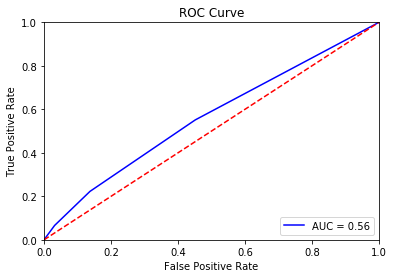

0.5634018728757062


In [5]:
X_train, X_test, y_train, y_test = train_test_split(cleandata_X, cleandata_y, test_size=0.2)

knn_clean = KNeighborsClassifier(n_neighbors = 8)
knn_clean.fit(X_train, y_train)

y_scores = knn_clean.predict_proba(X_test)

print_roc_curve(y_test, y_scores[:,1])

Lets do some cross validation to look at the results of our model.

In [6]:
print('Results for clean data')
print(knn_clean.score(X_test, y_test))

cv_scores = cross_val_score(knn_clean, cleandata_X, cleandata_y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

Results for clean data
0.9180690372827341
[0.91871941 0.91860427 0.91857175 0.91863679 0.91884817]
cv_scores mean:0.9186760797391562


Next, lets run fit a kNN model for our updated home credit data.

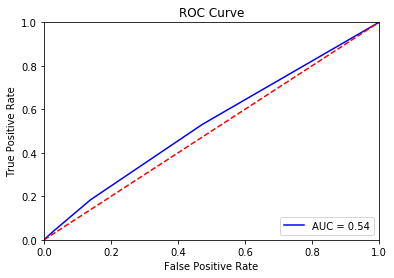

0.5359096493327437


In [7]:
X_train, X_test, y_train, y_test = train_test_split(home_credit_data_X, home_credit_data_y, test_size=0.2)

knn_home_credit = KNeighborsClassifier(n_neighbors = 8)
knn_home_credit.fit(X_train, y_train)

y_scores = knn_home_credit.predict_proba(X_test)

print_roc_curve(y_test, y_scores[:,1])

Lets do some cross validation to look at the results of our model.

In [8]:
print('Results for Home Credit data')
print(knn_home_credit.score(X_test, y_test))

cv_scores = cross_val_score(knn_home_credit, home_credit_data_X, home_credit_data_y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

Results for Home Credit data
0.9181991122384274
[0.91884949 0.91862053 0.91914084 0.91884817 0.91876687]
cv_scores mean:0.9188451795080257


Logistic Regression is another Machine Learning classification algorithm that is used to predict the probability of a binary dependent variable. This works well for our case, as our probably is a binary classification problem.

Lets fit a LogReg model for our clean data.

C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


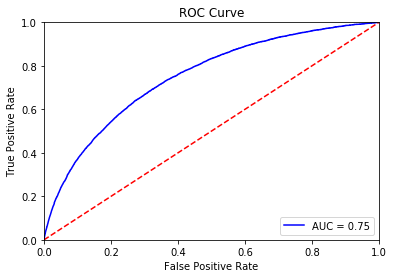

0.7493509798244982


In [9]:
X_train, X_test, y_train, y_test = train_test_split(cleandata_X, cleandata_y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_cleandata = LogisticRegression()
logreg_cleandata.fit(X_train, y_train)

y_scores = logreg_cleandata.predict_proba(X_test)

print_roc_curve(y_test, y_scores[:,1])

Lets do some cross validation to look at the results of our model.

In [11]:
print('Results for clean data')
print(logreg_cleandata.score(X_test, y_test))

cv_scores = cross_val_score(logreg_cleandata, cleandata_X, cleandata_y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

Results for clean data
0.9204153749430919


C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.91925597 0.91927092 0.91927092 0.91927092 0.91927092]
cv_scores mean:0.919267928665828


Next we will look at the home credit data

C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


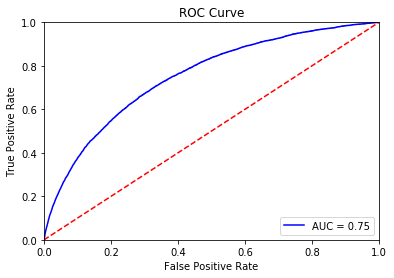

0.7511774471096546


In [13]:
X_train, X_test, y_train, y_test = train_test_split(home_credit_data_X, home_credit_data_y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_home_credit = LogisticRegression()
logreg_home_credit.fit(X_train, y_train)

y_scores = logreg_home_credit.predict_proba(X_test)

print_roc_curve(y_test, y_scores[:,1])

Lets do some cross validation to look at the results of our model.

In [14]:
print('Results for Home Credit data')
print(logreg_home_credit.score(X_test, y_test))

cv_scores = cross_val_score(logreg_home_credit, home_credit_data_X, home_credit_data_y, cv=5)

print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

Results for Home Credit data
0.9202961389208056


C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jholb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.91927223 0.91927092 0.91927092 0.91925466 0.91927092]
cv_scores mean:0.9192679286129536
